In [1]:
#import the reqiered libraries and read the data

import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
#checking if there are any null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
#To find the unique values in categorial features
print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
#Finding number of years

final_df["Number of years"] = 2022 - final_df["Year"]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
final_df.drop("Year", inplace= True, axis =1)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
#Get dummies for categorial features
final_df= pd.get_dummies(final_df , drop_first = True)

final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [12]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

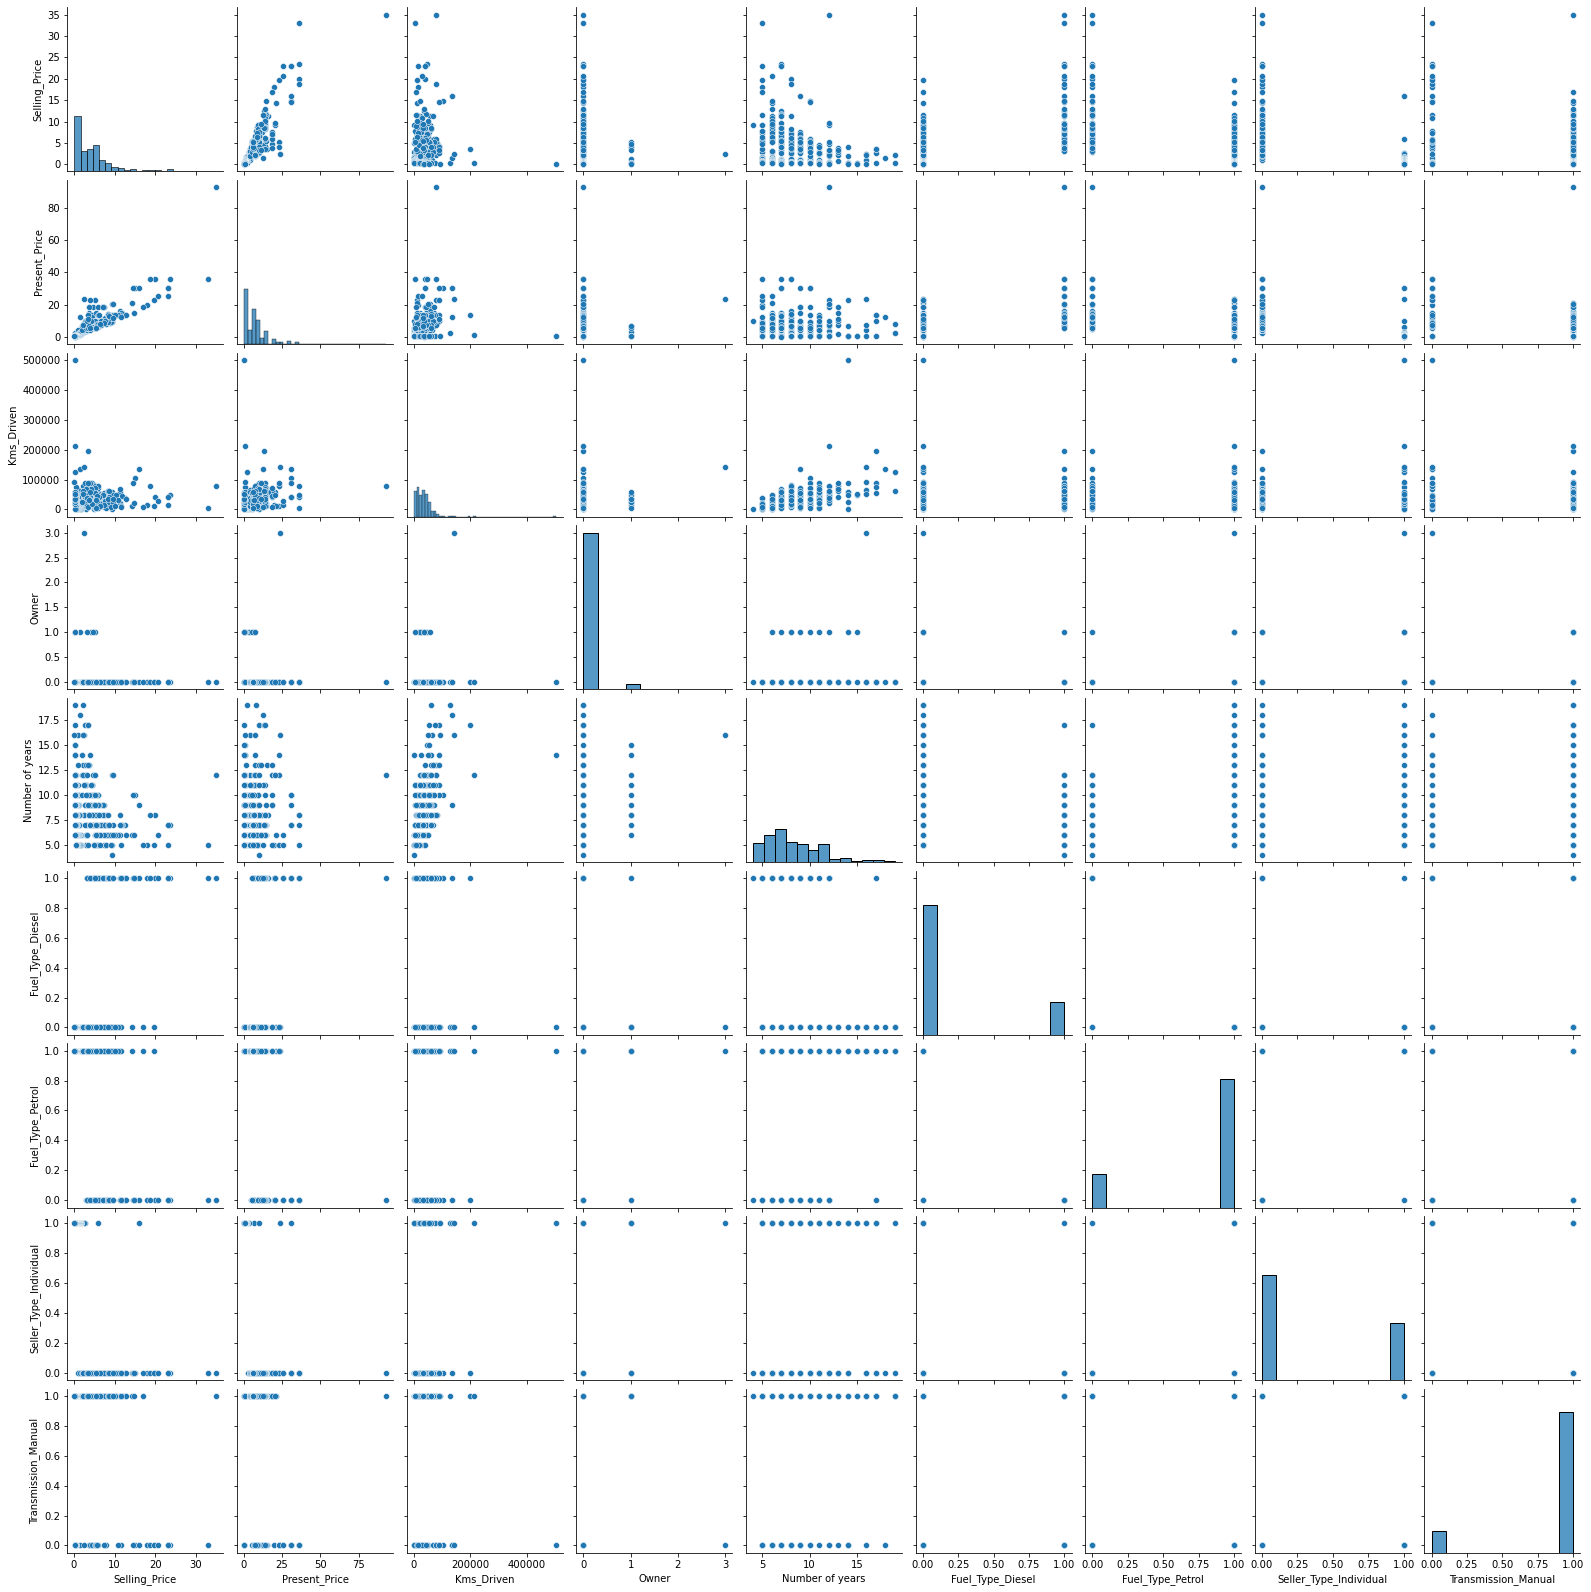

In [14]:
sns.pairplot(final_df)

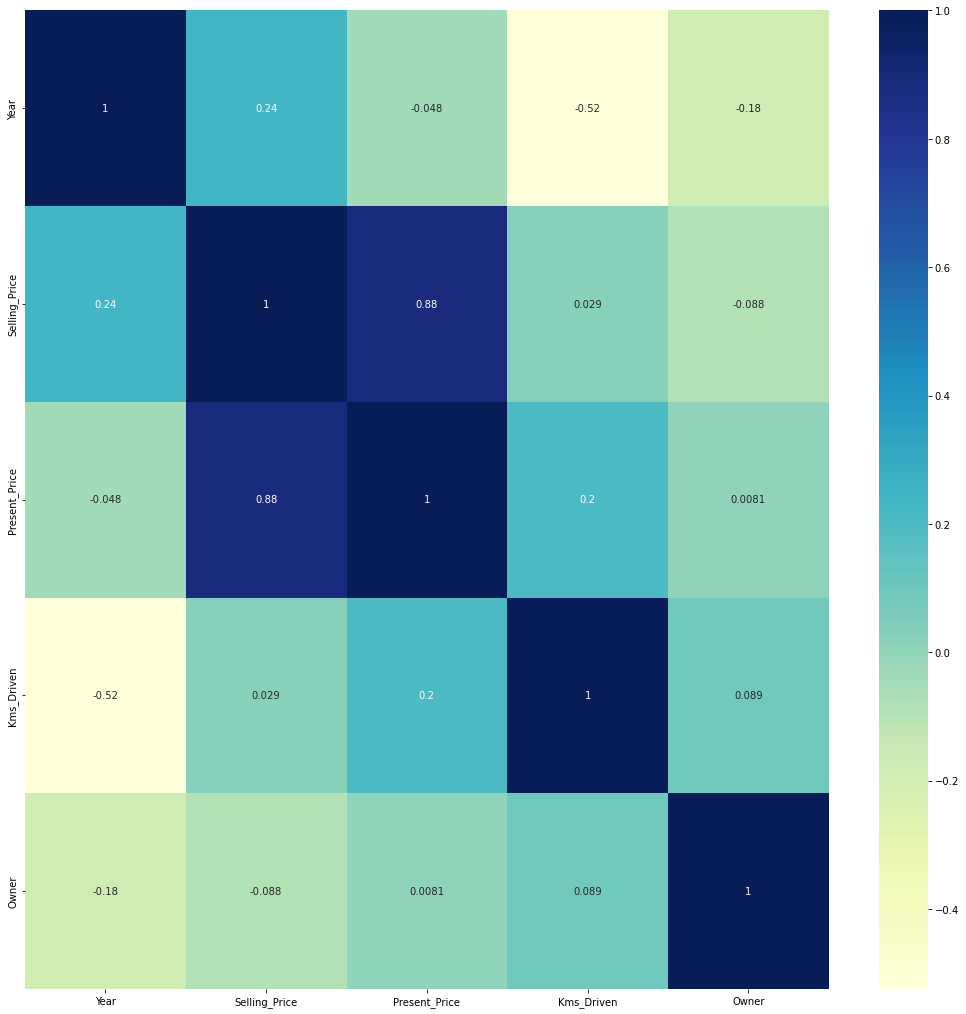

In [15]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr() , annot=True, cmap="YlGnBu")
plt.show()

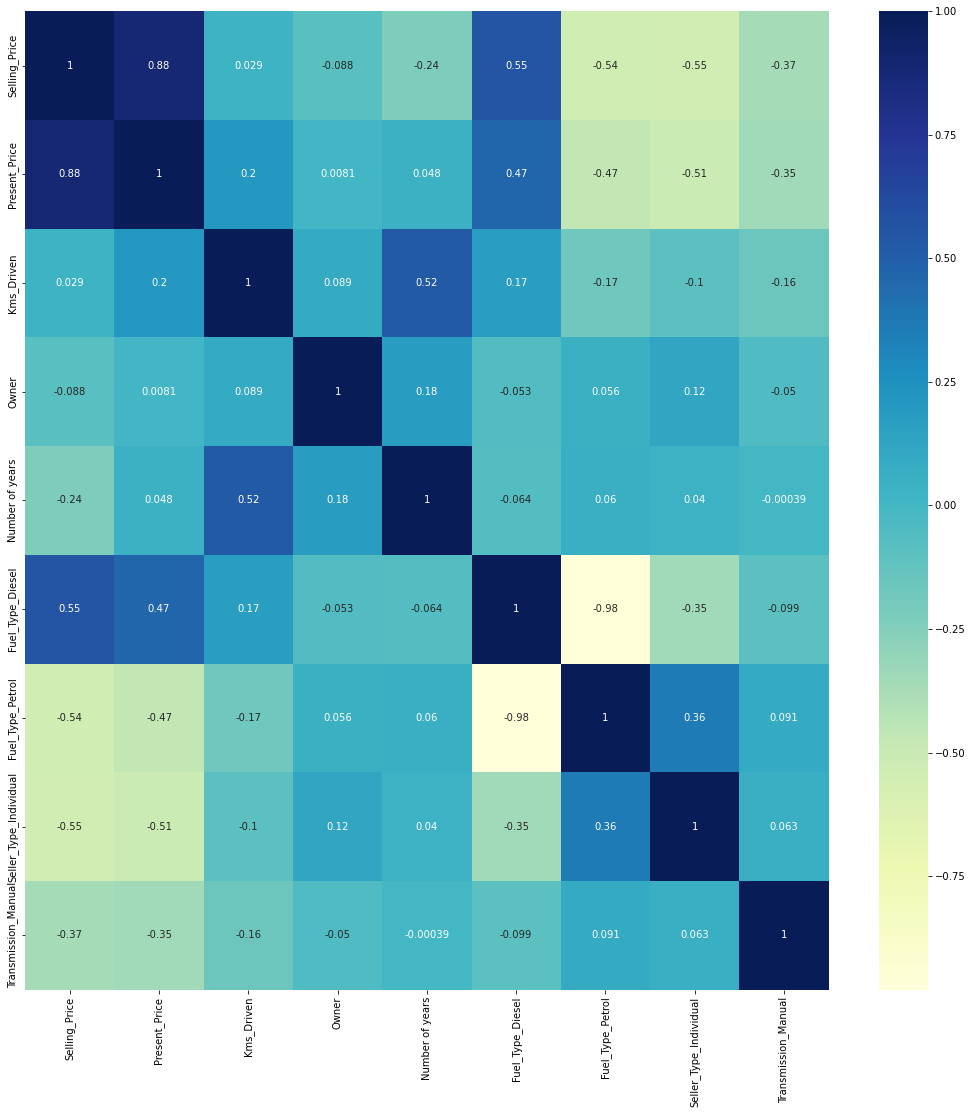

In [16]:
plt.figure(figsize = (18,18))
sns.heatmap(final_df.corr() , annot=True, cmap="YlGnBu")
plt.show()

In [17]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,Number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
#Important features selection using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

important = ExtraTreesRegressor()
important.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(important.feature_importances_)

[0.38159355 0.04408878 0.00084217 0.07415937 0.2417489  0.00597449
 0.12605935 0.12553339]


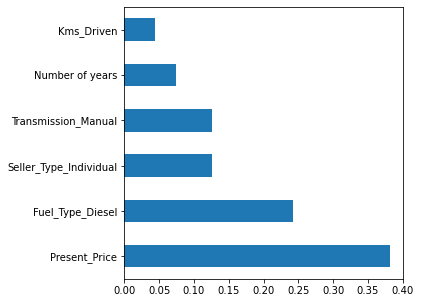

In [22]:
plt.figure(figsize = (5,5))
impt_feat= pd.Series(important.feature_importances_ , index= X.columns)
impt_feat.nlargest(6).plot(kind="barh")
plt.show()

This shows that Present_Price, Fuel_Type_Diesel, Transmission_Manual are some of the important features

# Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
   (Scaling is not done in Random forest)
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [23]:
# splitting the data into train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.3, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg= RandomForestRegressor()

In [25]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = rf_reg.predict(X_test)

In [27]:
rf_reg.score(X_train, y_train)

0.9858676703071064

In [28]:
rf_reg.score(X_test, y_test)

0.917112316396093

C:\Users\Sejal Pol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


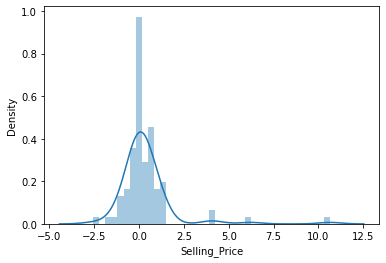

In [29]:
sns.distplot(y_test-y_pred)
plt.show()

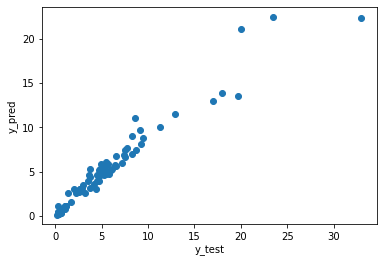

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [31]:
from sklearn import metrics
import numpy as np

print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 0.7485307692307693
MSE : 2.4788437662637346
RMSE : 1.5744344274258406


In [32]:
metrics.r2_score(y_test, y_pred)

0.917112316396093

# Hyperparameter Tuning using RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
#Randomized Search CV

#numder of the decision tree in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#number of features to consider at every split
max_features = ['auto' , 'sqrt']

# Maximum number of levels in tree
max_depth = [int (x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node 
min_samples_split =  [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [37]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator= rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5,verbose=2, 
                              random_state=42, n_jobs = 1)

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [40]:
rf_random.best_score_

-3.9889694986821715

In [41]:
y_predicts= rf_random.predict(X_test)

In [42]:
y_predicts

array([ 7.10470364,  0.5374    ,  5.09088   ,  9.33920364, 16.32799   ,
        4.96863   ,  3.43407   ,  0.7737    ,  4.7129    ,  4.4846    ,
        3.0893    ,  0.88158   ,  4.98712   ,  7.92059   ,  7.88388364,
       10.48176   ,  7.27817   ,  4.0952    ,  0.48897   ,  1.47145   ,
        3.99415   ,  4.60086   ,  5.5195    ,  9.47632   ,  0.24758   ,
        0.77266   ,  0.47215   ,  0.63359   ,  0.49962   ,  4.93809   ,
        5.01524   ,  5.7879    ,  0.50272   ,  8.88597364,  3.4454    ,
        1.16594   ,  5.63411   ,  7.39841   ,  0.24008   ,  9.01912   ,
        9.36292364, 19.6435    ,  4.90306   ,  4.08895   ,  5.3968    ,
       11.82227   ,  0.32335   ,  0.90322   ,  4.96095   ,  8.62075364,
        7.48136   ,  3.52748   ,  4.71275   , 20.8865    ,  1.09431   ,
        1.03176   ,  0.5311    ,  2.7157    ,  3.68385   ,  1.282     ,
        3.89825   ,  8.60337   ,  3.19541   , 20.96326   ,  4.18471   ,
        5.49139   , 10.15156   ,  4.79127   ,  0.54722   ,  3.00

C:\Users\Sejal Pol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

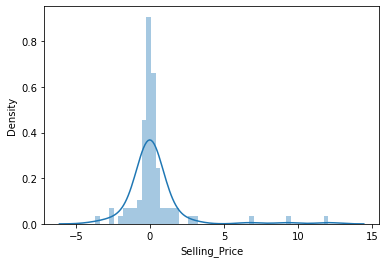

In [43]:
sns.distplot(y_test-y_predicts)

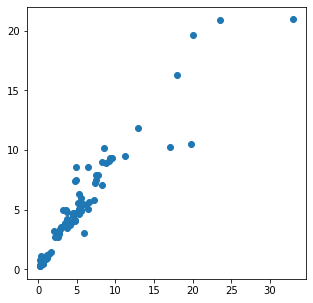

In [45]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, y_predicts)
plt.xlabel= "y_test"
plt.ylabel= "y_predicts"
plt.show()

In [48]:
from sklearn import metrics 

print("Mean Squared Error =", metrics.mean_squared_error(y_test, y_predicts))
print("Mean Absolute Error =", metrics.mean_absolute_error(y_test, y_predicts))
print("Root Mean Squared Error =", np.sqrt(metrics.mean_squared_error(y_test, y_predicts)))

Mean Squared Error = 3.913428075520756
Mean Absolute Error = 0.8792840359640379
Root Mean Squared Error = 1.978238629569435


# Save the model

In [49]:
import pickle 
#open file to save the model
file= open("car_rf_regression.pkl", 'wb')

#dump the model created in the file
pickle.dump(rf_random, file)
